In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) # Notice here
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
random_state=1515

In [4]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [11]:
def extract_feature(file_name,mfcc,chroma,mel,zcr,rmse):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if zcr:
            zcr=np.mean(librosa.feature.zero_crossing_rate(y=X, frame_length=2048, hop_length=512).T,axis=0)
            result=np.hstack((result, zcr))
        if rmse:
            rmse=np.mean(librosa.feature.rms(S=stft,frame_length=2048, hop_length=512, pad_mode='reflect').T,axis=0)
            result=np.hstack((result, rmse))
    return result

In [12]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'pos',
  '04':'neg',
  '05':'angry',
  '06':'neg',
  '07':'disgust',
  '08':'pos'
}

#Emotions to observe
observed_emotions=['pos','neg']

In [14]:
x,y=[],[]
for file in glob.glob("D:/AAA_video_course/Programming/dataset/Actor_*/*.wav"):
    file_name=os.path.basename(file)
    emotion=emotions[file_name.split("-")[2]]
    if emotion not in observed_emotions:
        continue
    feature=extract_feature(file, mfcc=True,chroma= True,mel = True ,zcr = True,rmse = True)
    x.append(feature)
    y.append(emotion)

<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 

<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00024414 -0.00033569 -0.00048828 ... -0.00076294 -0.00048828
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00222778 -0.00241089 -0.00305176 ... -0.00048828 -0.0005188
 -0.0005188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[

<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ...  3.0517578e-04
  3.0517578e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  6.1035156e-05
  6.1035156e-05  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.9672852e-04 6.4086914e-04 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0a

<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[2.1362305e-04 2.4414062e-04 2.7465820e-04 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14

<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dab

<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-04 3.6621094e-04 3.0517578e-04 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[6.1035156e-05 1.2207031e-04 1.5258789e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ... -6.1035156e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14

<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04 -1.5258789e-04 -1.2207031e-04 ...  6.1035156e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 9.1552734e-05 ... 2.4414062e-04 3.0517578e-04
 3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0a

<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14

<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04 -9.1552734e-05 -1.2207031e-04 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[0.         0.         0.         ... 0.00140381 0.00143433 0.00137329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarni

<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 1.2207031e-04 1.5258789e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207 -0.00015259 -0.00015259 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 1.2207031e-04 ... 3.0517578e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[0

<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00036621  0.00036621  0.00042725 ... -0.00021362 -0.00021362
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00064087 0.00067139 0.0007019  ... 0.00039673 0.00393677 0.0067749 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -1.2207031e-04 ...  6.1035156e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-11-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.220

In [15]:
data = pd.DataFrame(y, columns =['emo'])
data

,emo
0,pos
1,pos
2,pos
3,pos
4,pos
...,...
667,pos
668,pos
669,pos
670,pos


In [16]:
data = pd.DataFrame(x)
data['labels'] = y
data

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,labels
0,-615.369812,64.712395,-17.525738,1.072117,2.143256,-0.745155,-10.137992,1.439839,-9.424702,-8.146935,...,3.972603e-07,4.076644e-07,4.310514e-07,3.922107e-07,1.901211e-07,2.014755e-08,6.627651e-09,0.075377,0.003777,pos
1,-636.328430,67.115738,-15.966241,4.984888,3.678653,0.797363,-11.596442,2.477604,-10.262893,-7.066807,...,3.483156e-07,3.331211e-07,2.742410e-07,2.308469e-07,1.496835e-07,2.090784e-08,6.573003e-09,0.068017,0.003401,pos
2,-623.560913,64.292656,-16.984367,1.986333,-0.777687,-1.095705,-10.206499,-1.095690,-12.033014,-9.559129,...,2.566644e-07,2.206453e-07,2.028324e-07,2.611933e-07,1.600055e-07,2.079741e-08,6.701691e-09,0.066605,0.003865,pos
3,-621.752197,65.943443,-13.400205,4.644872,0.761391,0.432881,-9.629009,-0.967144,-10.922279,-7.441060,...,3.229472e-07,2.867278e-07,1.995616e-07,1.947108e-07,7.353026e-08,1.064494e-08,7.022426e-09,0.077762,0.003725,pos
4,-507.979034,55.327003,-24.597252,-2.296390,2.203091,-5.133730,-15.940475,-2.384277,-10.304943,-11.138833,...,8.403097e-06,9.564511e-06,6.217404e-06,3.893496e-06,2.135214e-06,1.671284e-07,7.967569e-09,0.065765,0.009248,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,-616.322449,45.899368,-20.175966,3.753582,-11.131477,-3.964839,-14.135320,-4.771224,-15.621428,-8.477671,...,8.491018e-06,7.384906e-06,4.573611e-06,2.220480e-06,8.829790e-07,6.809478e-08,7.707873e-09,0.084300,0.004414,pos
668,-553.992004,56.614849,-14.907667,2.665700,-13.776782,-4.072508,-17.319796,-5.079650,-10.142247,-8.829942,...,1.607190e-05,1.069268e-05,7.949650e-06,5.543593e-06,2.543737e-06,2.691140e-07,8.435516e-09,0.086496,0.006483,pos
669,-575.845764,53.281605,-21.947104,5.056113,-12.553357,-2.494527,-20.614611,-6.246452,-10.795346,-8.800463,...,9.681801e-06,9.354031e-06,6.341832e-06,4.238621e-06,1.748711e-06,1.058250e-07,8.530503e-09,0.088036,0.005723,pos
670,-522.466980,43.700798,-14.606612,12.619474,-11.496837,1.743054,-13.268277,0.747497,-13.840753,-2.510027,...,1.056212e-04,9.373720e-05,5.188212e-05,3.660698e-05,1.774963e-05,1.735054e-06,1.348571e-08,0.099349,0.008254,pos


In [17]:
y = data['labels'].values
X = data.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, stratify=y)

In [18]:
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\pydeepinsight-0.1.1-py3.8.egg\pyDeepInsight\image_transformer.py:347: RuntimeWarning: invalid value encountered in log
  X_norm = np.log(X + np.abs(self._min0) + 1).clip(0, None)


In [19]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = np.unique(y_train_enc).size

In [20]:
num_classes

2

In [21]:
check = pd.DataFrame(y_train)
check['encoded'] = y_train_enc
check

,0,encoded
0,neg,0
1,pos,1
2,pos,1
3,neg,0
4,neg,0
...,...,...
532,pos,1
533,neg,0
534,pos,1
535,pos,1


In [22]:
distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    square_distances=True,
    n_jobs=-1
)

In [23]:
pixel_size = (128,128)     #227
it = ImageTransformer(
    feature_extractor=reducer, 
    pixels=pixel_size)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:825: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


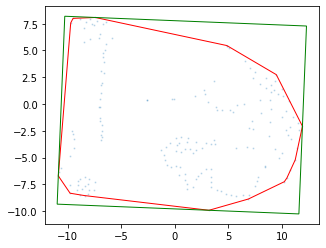

In [26]:
it.fit(X_train, y=y_train, plot=True)
X_train_img = it.transform(X_train_norm)
X_test_img = it.transform(X_test_norm)

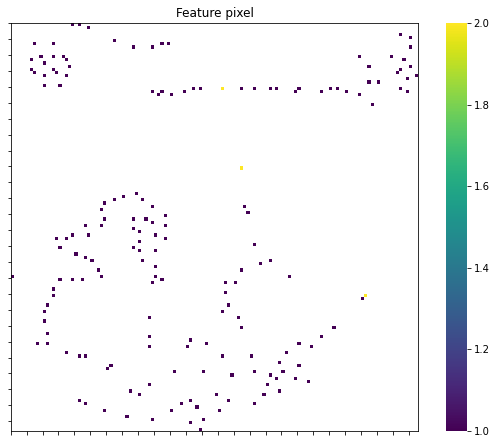

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7.5))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0., 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Feature pixel")

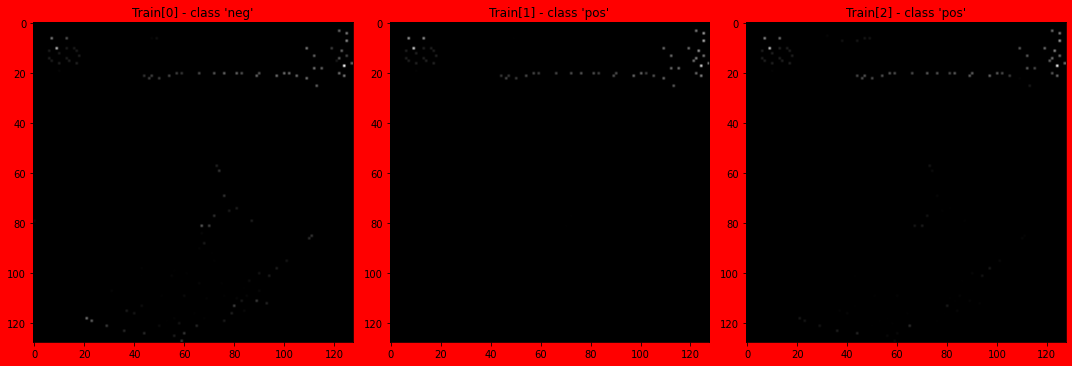

In [28]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
    ax[i].imshow(X_train_img[i],cmap="viridis")
    fig.set_facecolor("red")
    ax[i].title.set_text(f"Train[{i}] - class '{y_train[i]}'")
plt.tight_layout()

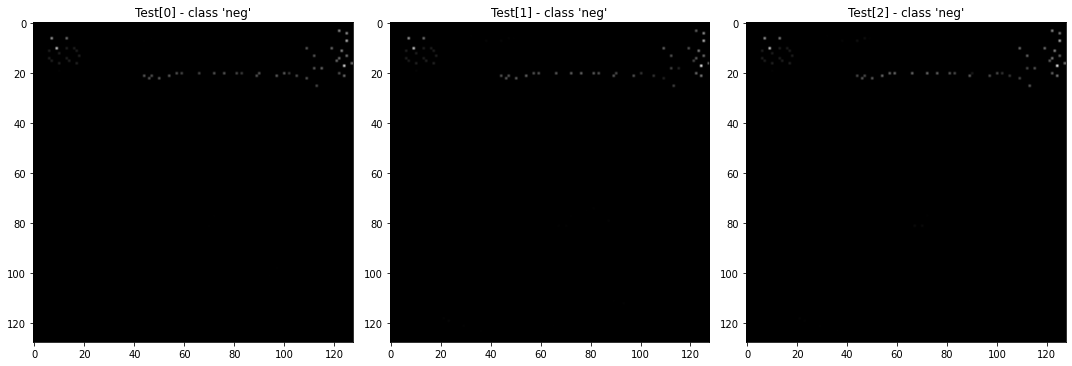

In [29]:
X_test_img = it.transform(X_test_norm)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
    ax[i].imshow(X_test_img[i])
    ax[i].title.set_text(f"Test[{i}] - class '{y_test[i]}'")
plt.tight_layout()

In [30]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import accuracy_score

import warnings; 
warnings.simplefilter('ignore')

In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [32]:
net = torch.hub.load(
    'pytorch/vision:v0.10.0', 'squeezenet1_1', 
    pretrained=True, verbose=False)
net.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), 
                              stride=(1,1))
net = net.to(device)

In [33]:
preprocess = transforms.Compose([
    transforms.ToTensor()
])

In [34]:
X_train_tensor = torch.stack([preprocess(img) for img in X_train_img]).float().to(device)
y_train_tensor = torch.from_numpy(le.fit_transform(y_train)).to(device)

X_test_tensor = torch.stack([preprocess(img) for img in X_test_img]).float().to(device)
y_test_tensor = torch.from_numpy(le.transform(y_test)).to(device)

In [35]:
batch_size = 50

trainset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = TensorDataset(X_test_tensor, y_test_tensor)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    net.parameters(),
    lr=1e-04,
    momentum=0.8,
    weight_decay=1e-05
)

In [37]:
for epoch in range(200):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = labels.type(torch.LongTensor)   # casting to long
        
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print epoch statistics
    if not (epoch % 20):
        print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')
print(f'[{epoch}] loss: {running_loss / len(X_train_tensor) * batch_size:.3f}')

[0] loss: 0.868
[20] loss: 0.705
[40] loss: 0.701
[60] loss: 0.692
[80] loss: 0.686
[100] loss: 0.679
[120] loss: 0.677
[140] loss: 0.671
[160] loss: 0.658
[180] loss: 0.649
[199] loss: 0.649


In [38]:
train_predicted = np.empty(0)
train_true = np.empty(0)
with torch.no_grad():
    net.eval()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
        train_predicted = np.append(train_predicted, pred)
        train_true = np.append(train_true, labels.cpu().detach().numpy())

In [39]:
test_predicted = np.empty(0)
test_true = np.empty(0)
with torch.no_grad():
    net.eval()
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        pred = torch.max(net(inputs),1)[1].cpu().detach().numpy()
        test_predicted = np.append(test_predicted, pred)
        test_true = np.append(test_true, labels.cpu().detach().numpy())


In [40]:
print(f"The train accuracy was {accuracy_score(train_predicted, train_true):.3f}")
print(f"The test accuracy was {accuracy_score(test_predicted, test_true):.3f}")

The train accuracy was 0.642
The test accuracy was 0.593


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_true, test_predicted)
cm

array([[43, 24],
       [31, 37]], dtype=int64)

<AxesSubplot:>

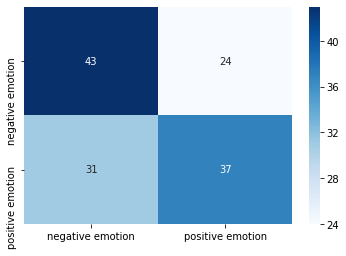

In [42]:
import seaborn as sns

cm_df = pd.DataFrame(cm, index=['negative emotion' , 'positive emotion'], columns=['negative emotion' , 'positive emotion'])
sns.heatmap(cm_df, annot=True, 
            fmt='', cmap='Blues')


In [43]:
accuracy=accuracy_score(y_true=test_true, y_pred=test_predicted)
print("Logistic-Accuracy: {:.2f}%".format(accuracy*100))
from sklearn.metrics import classification_report
print(classification_report(test_true,test_predicted))
print()

Logistic-Accuracy: 59.26%
              precision    recall  f1-score   support

         0.0       0.58      0.64      0.61        67
         1.0       0.61      0.54      0.57        68

    accuracy                           0.59       135
   macro avg       0.59      0.59      0.59       135
weighted avg       0.59      0.59      0.59       135




In [44]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
cm.diagonal()*100

array([64.17910448, 54.41176471])

Text(0.5, 1.0, 'accuracy of each class')

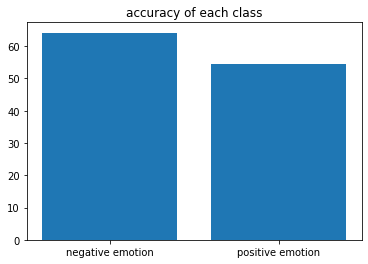

In [45]:
plt.bar(['negative emotion' , 'positive emotion'],cm.diagonal()*100)
plt.xticks(rotation=0)
plt.title("accuracy of each class")